In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
data=pd.read_csv(r'D:\python_codes\ML\heart.csv')

In [78]:
df=data.copy()

In [79]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [80]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [81]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [82]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [83]:
y.shape

(918,)

In [84]:
y.value_counts()
label=[1,0]

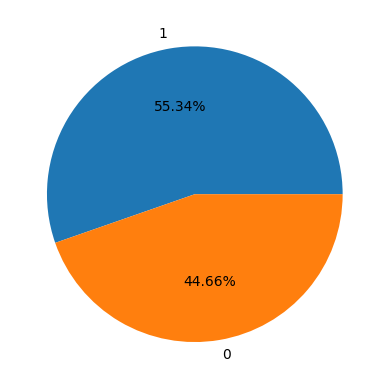

In [85]:
plt.pie(y.value_counts(), autopct='%.2f%%',labels=label)
plt.show()

In [86]:
x=pd.get_dummies(x,drop_first=True)

In [87]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [88]:
from sklearn. model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=44)

In [89]:
x_train.shape,y_train.shape

((716, 15), (716,))

In [90]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE()
# x_sampled,y_sampled=smote.fit_resample(x_train,y_train)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score
models={
    # 'KNeighborsClassifier':KNeighborsClassifier(),
    # 'LogisticRegression':LogisticRegression(),
    # 'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()
}
for i in range(len(list(models))):
    clf=list(models.values())[i]
    clf.fit(x_train,y_train)

    y_train_pred=clf.predict(x_train)
    y_test_pred=clf.predict(x_test)


    print('Model : ',list(models.keys())[i])

    print('-------for train data -----'.center(40))

    print(f'{'accuracy score' :<15} :{accuracy_score(y_train,y_train_pred)}')
    print(f'{'recall_score' :<15} :{recall_score(y_train,y_train_pred)}')
    print(f'{'f1_score' :<15} :{f1_score(y_train,y_train_pred)}')
    print(f'{'precision_score' :<15} :{precision_score(y_train,y_train_pred)}')
    print(f'{'roc_auc_score' :<15} :{roc_auc_score(y_train,y_train_pred)}')
    print()
    print('-------for test data -----'.center(40))

    print(f'{'accuracy score' :<15} :{accuracy_score(y_test,y_test_pred):.4f}')
    print(f'{'recall_score' :<15} :{recall_score(y_test,y_test_pred):.4f}')
    print(f'{'f1_score' :<15} :{f1_score(y_test,y_test_pred):.4f}')
    print(f'{'precision_score' :<15} :{precision_score(y_test,y_test_pred):.4f}')
    print(f'{'roc_auc_score' :<15} :{roc_auc_score(y_test,y_test_pred):.4f}')

    print('*******************************************************************************************')
    print()

Model :  RandomForest
      -------for train data -----       
accuracy score  :1.0
recall_score    :1.0
f1_score        :1.0
precision_score :1.0
roc_auc_score   :1.0

       -------for test data -----       
accuracy score  :0.8614
recall_score    :0.8739
f1_score        :0.8739
precision_score :0.8739
roc_auc_score   :0.8600
*******************************************************************************************

Model :  AdaBoostClassifier
      -------for train data -----       
accuracy score  :0.8812849162011173
recall_score    :0.9118387909319899
f1_score        :0.8949320148331273
precision_score :0.8786407766990292
roc_auc_score   :0.8775494895098822

       -------for test data -----       
accuracy score  :0.8515
recall_score    :0.8378
f1_score        :0.8611
precision_score :0.8857
roc_auc_score   :0.8530
*******************************************************************************************

Model :  GradientBoostingClassifier
      -------for train data -----    

In [92]:
rf_params={
    'max_depth':[10,20,44,100,1000],
    'max_features':['auto',10,5,3],
    'max_leaf_nodes':[10,26,44,100,105],
    'min_samples_split':[5,12,19,35],
    'n_estimators':[10,100,1000],
}
# knn_params={
#     'n_neighbors':[3,5,9,10,20,80]
# }
ada_params={
    'n_estimators':[50,60,40,70,80],
    'algorithm':['SAMME','SAMME.R']
}
gd_params={
    'loss':['log_loss','deviance','exponential'],
    'criterion':['fireman_mse','squared_error','mse'],
    'min_samples_split':[2,4,9,12,20],
    'n_estimators':[100,200,500,1000],
    'max_depth':[5,9,100,'None',50]
}
xg_params={
    'n_estimators':[100,250,400],
    'learning_rate':[0.1,0.001],
    'max_depth':[5,8,11,15,22],
    'colsample_bytree':[0.5,0.8,1,0.3,0.4]
}

In [93]:
randomcv_model=[
    # ('KNN',KNeighborsClassifier(),knn_params),
    ('RF',RandomForestClassifier(),rf_params), 
    # ('AB',AdaBoostClassifier(),ada_params),
    # ('GB',GradientBoostingClassifier(),gd_params),
    # ('XG',XGBClassifier(),xg_params)
]

In [94]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name, model, params in randomcv_model:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,cv=3,verbose=5,n_iter=100,n_jobs=-1)
    random.fit(x_train,y_train)
    model_params[name]=random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [95]:
for model_name in model_params:
    print(f' best params for {model_name}')
    print(model_params[model_name])
    print()

 best params for RF
{'n_estimators': 100, 'min_samples_split': 12, 'max_leaf_nodes': 44, 'max_features': 3, 'max_depth': 100}



In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score
model1={
    # 'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=80),
    'RandomForest':RandomForestClassifier(n_estimators=100,min_samples_split= 12,max_leaf_nodes= 44,max_features=3,max_depth=100),
#     'AdaBoostClassifier':AdaBoostClassifier(n_estimators=40,algorithm='SAMME'),
    # 'GradientBoostingClassifier':GradientBoostingClassifier(loss='log_loss',criterion='squared_error',min_samples_split=12,n_estimators=200,max_depth=5),
#     'XGBClassifier':XGBClassifier(n_estimators=250,max_depth=11,learning_rate=0.001,colsample_bytree=0.3)
}
for i in range(len(list(models))):
    clf1=list(models.values())[i]
    clf1.fit(x_train,y_train)

    y_train_pred=clf1.predict(x_train)
    y_test_pred=clf1.predict(x_test)


    print('Model : ',list(models.keys())[i])

    print('-------for train data -----'.center(40))

    print(f'{'accuracy score' :<15} :{accuracy_score(y_train,y_train_pred)}')
    print(f'{'recall_score' :<15} :{recall_score(y_train,y_train_pred)}')
    print(f'{'f1_score' :<15} :{f1_score(y_train,y_train_pred)}')
    print(f'{'precision_score' :<15} :{precision_score(y_train,y_train_pred)}')
    print(f'{'roc_auc_score' :<15} :{roc_auc_score(y_train,y_train_pred)}')
    print()
    print('-------for test data -----'.center(40))

    print(f'{'accuracy score' :<15} :{accuracy_score(y_test,y_test_pred):.4f}')
    print(f'{'recall_score' :<15} :{recall_score(y_test,y_test_pred):.4f}')
    print(f'{'f1_score' :<15} :{f1_score(y_test,y_test_pred):.4f}')
    print(f'{'precision_score' :<15} :{precision_score(y_test,y_test_pred):.4f}')
    print(f'{'roc_auc_score' :<15} :{roc_auc_score(y_test,y_test_pred):.4f}')

    print('*******************************************************************************************')
    print()'''

In [106]:
model2=RandomForestClassifier(n_estimators=100,min_samples_split= 12,max_leaf_nodes= 44,max_features=3,max_depth=100)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [107]:
print(f'{'accuracy score' :<15} :{accuracy_score(y_test,y_predict):.4f}')
print(f'{'recall_score' :<15} :{recall_score(y_test,y_predict):.4f}')
print(f'{'f1_score' :<15} :{f1_score(y_test,y_predict):.4f}')
print(f'{'precision_score' :<15} :{precision_score(y_test,y_predict):.4f}')
print(f'{'roc_auc_score' :<15} :{roc_auc_score(y_test,y_predict):.4f}')

accuracy score  :0.8564
recall_score    :0.8739
f1_score        :0.8700
precision_score :0.8661
roc_auc_score   :0.8545


In [109]:
import pickle
with open('randomforest_model.plk', 'wb') as rf:
    pickle.dump(model2,rf)